In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/Gender_Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53982 entries, 0 to 53981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    53982 non-null  object
 1   Gender  53982 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 843.6+ KB


In [ ]:
df.head()

,Name,Gender
0,Aaban,0
1,Aabharan,0
2,Aabhas,0
3,Aabhat,0
4,Aabheer,0


##### Total no.of (rows,columns)

In [ ]:
df.shape

(53982, 2)

##### Total no.of cells

In [ ]:
df.size

107964

In [ ]:
df.isnull().sum()

,0
Name,0
Gender,0


In [ ]:
df['Gender'].value_counts()

,count
Gender,
0,29014
1,24968


#### 0: Male
#### 1: Female

#### Feature Extraction: (last letter, last letter)

In [ ]:
names= df['Name']
genders= df['Gender']

df['last_letter']= df['Name'].apply(lambda x: x[-1])
df['last_two_letters']= df['Name'].apply(lambda x: x[-2:])

#### Implementing Naive Bayes Classifier with NLTK

##### for last letter:

In [ ]:
import nltk
from nltk import NaiveBayesClassifier
from nltk.classify import accuracy

# function to access only last letter
def gender_features(name):

    if len(name) > 0:
        return {'last_letter': name[-1].lower()}
    else:
        return {'last_letter': ''}

features = [(gender_features(name), gender) for name, gender in zip(names, genders) if isinstance(name, str) and len(name) > 0]

# Split data into training and test sets
train_size = int(0.8 * len(features))
train_set, test_set = features[:train_size], features[train_size:]

# Train Naive Bayes Classifier
classifier = NaiveBayesClassifier.train(train_set)





In [ ]:
# Evaluating the classifier
print(f"Accuracy: {accuracy(classifier, test_set)}")

Accuracy: 0.921181809761971


In [ ]:

# Most informative features
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'n'                 0 : 1      =     47.3 : 1.0
             last_letter = 'v'                 0 : 1      =     47.1 : 1.0
             last_letter = 'g'                 0 : 1      =     39.3 : 1.0
             last_letter = 'j'                 0 : 1      =     28.6 : 1.0
             last_letter = 'k'                 0 : 1      =     24.5 : 1.0
             last_letter = 'd'                 0 : 1      =     23.2 : 1.0
             last_letter = 's'                 0 : 1      =     18.5 : 1.0
             last_letter = 'h'                 0 : 1      =     10.8 : 1.0
             last_letter = 'i'                 1 : 0      =      8.4 : 1.0
             last_letter = 't'                 0 : 1      =      8.2 : 1.0


In [ ]:
# Testing with a sample name
sample_name = "ravil"

sample_features = gender_features(sample_name)

predicted_gender = classifier.classify(sample_features)

print(f"The predicted gender for the name '{sample_name}' is: {predicted_gender}")


The predicted gender for the name 'ravil' is: 0


### for last two letters:

In [ ]:
# function to consider last two letters
def gender_features(name):
    if len(name) > 1:
        return {'last_two_letters': name[-2:].lower()}  # Only include last two letters
    elif len(name) == 1:
        return {'last_two_letters': name[-1].lower()}  # If name is only 1 character long
    else:
        return {'last_two_letters': ''}  # Handle empty string case

features = [(gender_features(name), gender) for name, gender in zip(names, genders) if isinstance(name, str) and len(name) > 0]

# Split data into training and test sets
train_size = int(0.8 * len(features))
train_set, test_set = features[:train_size], features[train_size:]

# Train Naive Bayes Classifier
classifier = NaiveBayesClassifier.train(train_set)




In [ ]:
from nltk.classify.util import accuracy

# After defining your classifier and test_set...
print(f"Accuracy: {accuracy(classifier, test_set)}")


Accuracy: 0.9372047791053071


In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
        last_two_letters = 'an'                0 : 1      =     88.4 : 1.0
        last_two_letters = 'th'                0 : 1      =     58.0 : 1.0
        last_two_letters = 'ca'                1 : 0      =     52.3 : 1.0
        last_two_letters = 'ia'                1 : 0      =     44.6 : 1.0
        last_two_letters = 'av'                0 : 1      =     44.5 : 1.0
        last_two_letters = 'ka'                1 : 0      =     41.5 : 1.0
        last_two_letters = 'nd'                0 : 1      =     39.8 : 1.0
        last_two_letters = 'sh'                0 : 1      =     38.2 : 1.0
        last_two_letters = 'as'                0 : 1      =     37.0 : 1.0
        last_two_letters = 'nt'                0 : 1      =     34.9 : 1.0


In [ ]:
# Test with a sample name
sample_name = "Raman"
sample_features = gender_features(sample_name)
predicted_gender = classifier.classify(sample_features)

print(f"The predicted gender for the name '{sample_name}' is: {predicted_gender}")

if predicted_gender == 0:
    predicted_gender = 'Male'
elif predicted_gender == 1:
    predicted_gender = 'Female'

# Output the result
print(f"The predicted gender for the name '{sample_name}' is: {predicted_gender}")


The predicted gender for the name 'Raman' is: 0
The predicted gender for the name 'Raman' is: Male


### comparing between Spacy and SKLearn Classifier

In [ ]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create feature function (using last letter and last two letters)
def gender_features(name):
    # Safeguard for empty names
    if len(name) > 1:
        return {'last_letter': name[-1].lower(), 'last_two_letters': name[-2:].lower()}
    elif len(name) == 1:
        return {'last_letter': name[-1].lower(), 'last_two_letters': name[-1].lower()}  # Handle single character names
    else:
        return {'last_letter': '', 'last_two_letters': ''}  # Handle empty names

# Convert to dictionary format for sklearn
features = [gender_features(name) for name in names]
genders = np.array(genders)

# Use DictVectorizer to convert feature dictionaries to feature matrices
vectorizer = DictVectorizer(sparse=False)
X = vectorizer.fit_transform(features)
y = genders

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Model using MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on test set and evaluate
predictions = clf.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, predictions)
print(f"sklearn_accuracy: {sklearn_accuracy}")



sklearn_accuracy: 0.9055293136982495


In [ ]:
# Testing with a sample name
sample_name = "jayen"
sample_features = vectorizer.transform([gender_features(sample_name)])

predicted_gender = clf.predict(sample_features)

if predicted_gender == 0:
    predicted_gender = 'Male'
elif predicted_gender == 1:
    predicted_gender = 'Female'

print(f"The predicted gender for the name '{sample_name}' is: {predicted_gender}")


The predicted gender for the name 'jayen' is: Male


In [ ]:
import spacy
import random
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import names
import nltk

# Download names dataset from NLTK
nltk.download('names')

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Get names from NLTK corpus
male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]

# Combine and shuffle the names
all_names = male_names + female_names
random.shuffle(all_names)

# Separate the names and genders
names, genders = zip(*all_names)

# function to access last two letter and last letter feature
def gender_features(name):
    if len(name) > 1:
        return {'last_letter': name[-1].lower(), 'last_two_letters': name[-2:].lower()}
    elif len(name) == 1:
        return {'last_letter': name[-1].lower(), 'last_two_letters': name[-1].lower()}  # Handle single character names
    else:
        return {'last_letter': '', 'last_two_letters': ''}  # Handle empty names

# Using SpaCy to extract features
def spacy_gender_prediction(name):
    # Create a document using SpaCy
    doc = nlp(name)

    # Extract features using the same logic
    features = gender_features(name)
    return features

# Extract features for each name using SpaCy
spacy_features = [spacy_gender_prediction(name) for name in names]

# Use DictVectorizer to convert feature dictionaries to feature matrices
vectorizer = DictVectorizer(sparse=False)
X = vectorizer.fit_transform(spacy_features)
y = np.array(genders)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Model using MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on test set and evaluate
predictions_spacy = clf.predict(X_test)

# Calculate accuracy for SpaCy-based predictions
spacy_accuracy = accuracy_score(y_test, predictions_spacy)
print(f"Accuracy (SpaCy): {spacy_accuracy}")


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


Accuracy (SpaCy): 0.7910635619886721


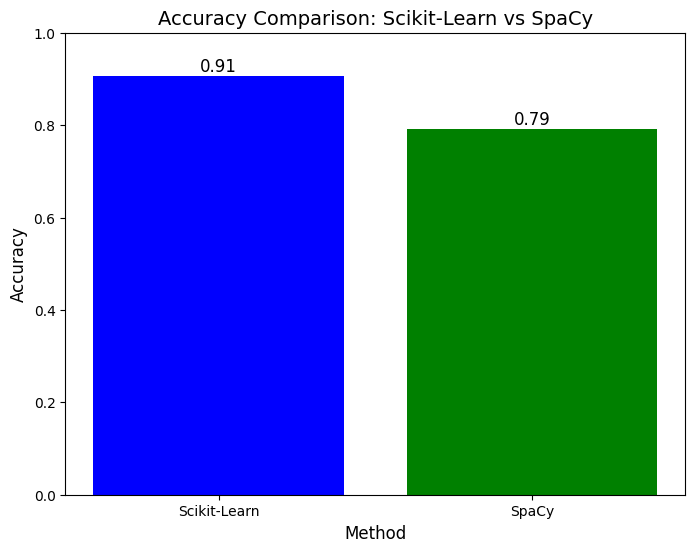

In [ ]:
import matplotlib.pyplot as plt

# Labels and values for the bar chart
methods = ['Scikit-Learn', 'SpaCy']
accuracies = [sklearn_accuracy, spacy_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color=['blue', 'green'])

# Add titles and labels
plt.title('Accuracy Comparison: Scikit-Learn vs SpaCy', fontsize=14)
plt.xlabel('Method', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Set Y axis limit from 0 to 1 (for percentage accuracy)


for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)

# Show the plot
plt.show()
